In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/Binta/OneDrive/Documents/Project/Project/Project 1.csv', sep=';')
df.head()

,Provinsi,Jumlah Penduduk,Kepadatan Penduduk per km2,IPM,PDRB,Garis Kemiskinan (Rp/Bulan)
0,Aceh,5554.8,98,74.03,243202.09,503746.0
1,Sumatera Utara,15588.5,215,74.02,1146919.76,493135.0
2,Sumatera Barat,5836.2,139,74.49,332936.44,540419.0
3,Riau,6728.1,75,74.79,1112481.62,514365.5
4,Jambi,3724.3,76,73.43,322975.53,494663.5


In [3]:
df.describe()

,Jumlah Penduduk,Kepadatan Penduduk per km2,IPM,PDRB,Garis Kemiskinan (Rp/Bulan)
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000
mean,7410.628947,678.236842,72.388421,5.794881e+05,483643.723684
std,11329.998264,2609.446368,5.150227,8.765249e+05,97385.522459
min,542.100000,5.000000,53.420000,2.656143e+04,346624.500000
25%,1510.275000,39.500000,71.080000,1.048701e+05,405911.000000
50%,3741.900000,100.000000,73.180000,2.330333e+05,474770.250000
75%,6505.125000,251.750000,74.345000,6.189420e+05,538371.625000
max,50345.200000,16165.000000,83.080000,3.679359e+06,788995.500000


In [4]:
# DATA UNDERSTANDING
structure = df.info()
descriptive_stats = df.describe()

# Tambahkan kolom pulau
pulau_mapping = {
    'Aceh': 'Sumatera', 'Sumatera Utara': 'Sumatera', 'Sumatera Barat': 'Sumatera',
    'Riau': 'Sumatera', 'Jambi': 'Sumatera', 'Sumatera Selatan': 'Sumatera', 
    'Bengkulu': 'Sumatera', 'Lampung': 'Sumatera', 'Kepulauan Bangka Belitung': 'Sumatera',
    'Kepulauan Riau': 'Sumatera',
    'DKI Jakarta': 'Jawa', 'Jawa Barat': 'Jawa', 'Jawa Tengah': 'Jawa', 
    'DI Yogyakarta': 'Jawa', 'Jawa Timur': 'Jawa', 'Banten': 'Jawa', 'Bali': 'Bali-Nusa',
    'Nusa Tenggara Barat': 'Bali-Nusa', 'Nusa Tenggara Timur': 'Bali-Nusa',
    'Kalimantan Barat': 'Kalimantan', 'Kalimantan Tengah': 'Kalimantan',
    'Kalimantan Selatan': 'Kalimantan', 'Kalimantan Timur': 'Kalimantan',
    'Kalimantan Utara': 'Kalimantan',
    'Sulawesi Utara': 'Sulawesi', 'Sulawesi Tengah': 'Sulawesi', 'Sulawesi Selatan': 'Sulawesi',
    'Sulawesi Tenggara': 'Sulawesi', 'Gorontalo': 'Sulawesi', 'Sulawesi Barat': 'Sulawesi',
    'Maluku': 'Maluku', 'Maluku Utara': 'Maluku',
    'Papua Barat': 'Papua', 'Papua Barat Daya': 'Papua', 'Papua': 'Papua',
    'Papua Selatan': 'Papua', 'Papua Tengah': 'Papua', 'Papua Pegunungan': 'Papua'
}
df['Pulau'] = df['Provinsi'].map(pulau_mapping)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Provinsi                     38 non-null     object 
 1   Jumlah Penduduk              38 non-null     float64
 2   Kepadatan Penduduk per km2   38 non-null     int64  
 3   IPM                          38 non-null     float64
 4   PDRB                         38 non-null     float64
 5   Garis Kemiskinan (Rp/Bulan)  38 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB


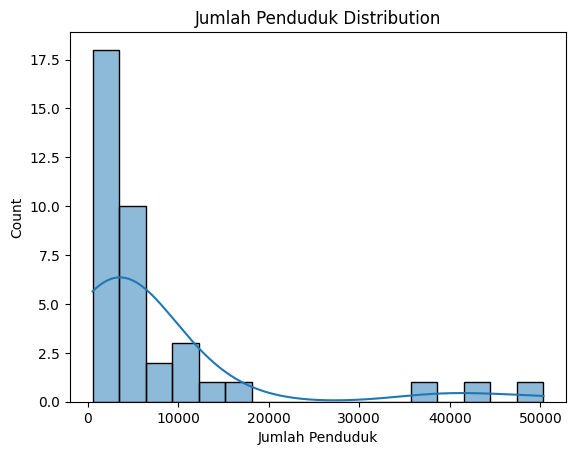

In [5]:
# Histogram with Kurva Kernel
sns.histplot(df['Jumlah Penduduk'], kde=True)
plt.title("Jumlah Penduduk Distribution")
plt.show()

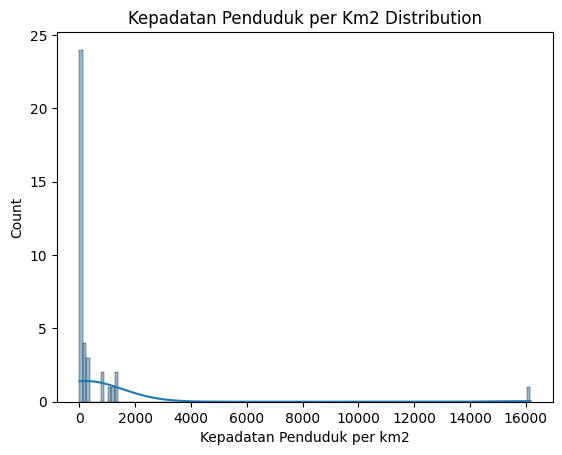

In [6]:
sns.histplot(df['Kepadatan Penduduk per km2'], kde=True)
plt.title("Kepadatan Penduduk per Km2 Distribution")
plt.show()

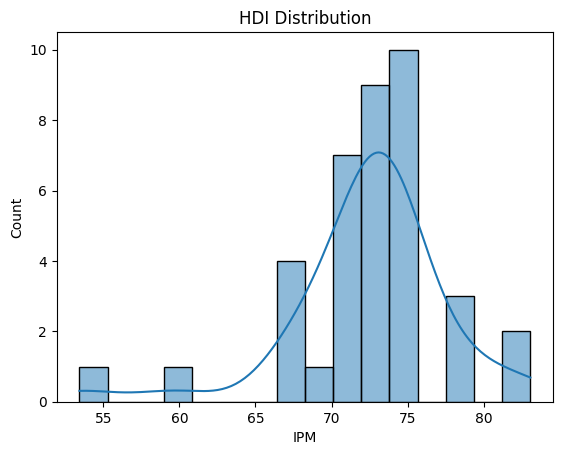

In [7]:
sns.histplot(df['IPM'], kde=True)
plt.title("HDI Distribution")
plt.show()

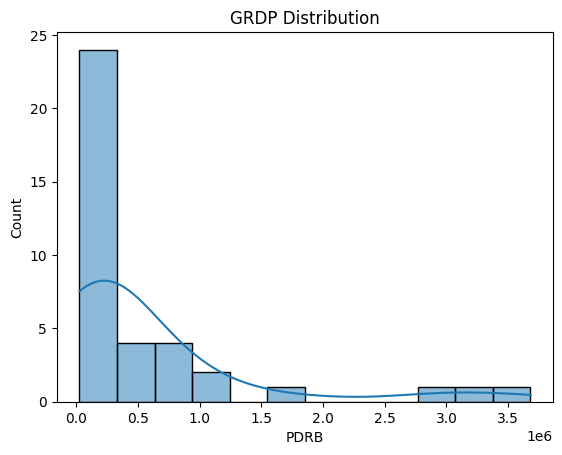

In [8]:
sns.histplot(df['PDRB'], kde=True)
plt.title("GRDP Distribution")
plt.show()

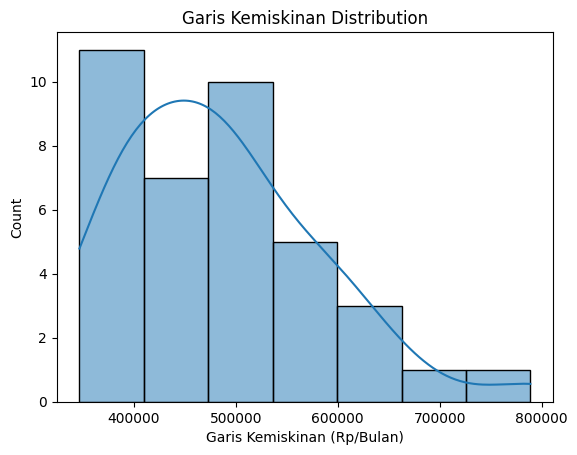

In [9]:
sns.histplot(df['Garis Kemiskinan (Rp/Bulan)'], kde=True)
plt.title("Garis Kemiskinan Distribution")
plt.show()

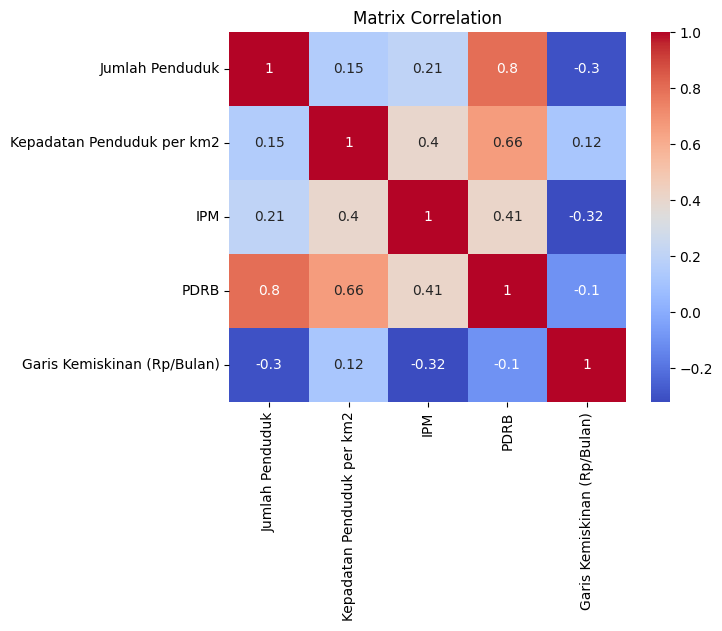

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrix Correlation")
plt.show()

In [11]:
# SCALING for clustering dan PCA
features = ['Jumlah Penduduk', 'Kepadatan Penduduk per km2', 'IPM', 'PDRB', 'Garis Kemiskinan (Rp/Bulan)']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

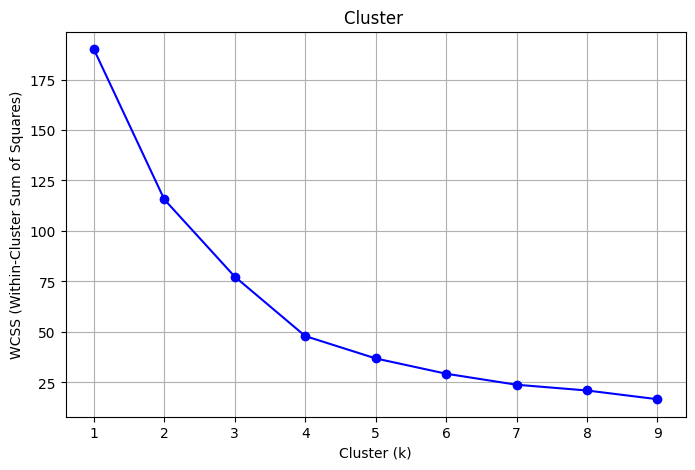

In [12]:
# KMeans Clustering (Elbow Method)
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Cluster ')
plt.xlabel('Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

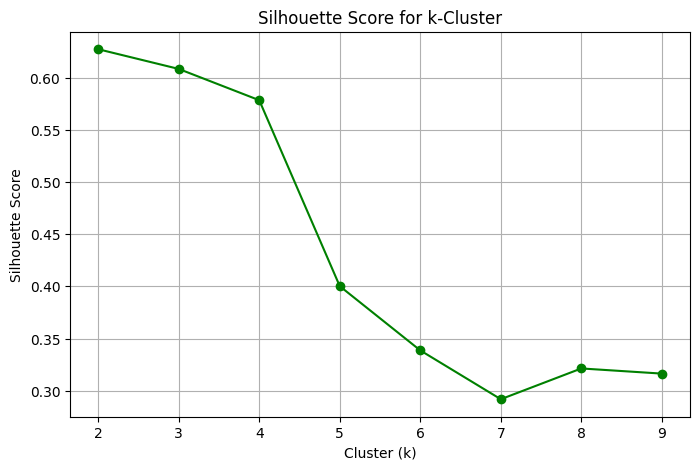

In [13]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Silhouette score
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score for k-Cluster")
plt.xlabel("Cluster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 10))
plt.grid(True)
plt.show()


In [ ]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init='auto')
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

In [15]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

In [16]:
# Variabel independen dan dependen
X_multi = df[['PDRB', 'Kepadatan Penduduk per km2', 'Garis Kemiskinan (Rp/Bulan)', 'Jumlah Penduduk']]
y_multi = df['IPM']

# Membuat dan melatih model regresi linier berganda
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)

# Menampilkan intercept dan koefisien
print("Intercept (β₀):", model_multi.intercept_)
print("Koefisien (β):")
for feature, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"  {feature}: {coef}")

# Prediksi dan evaluasi model
y_pred_multi = model_multi.predict(X_multi)
r2_multi = model_multi.score(X_multi, y_multi)
mse = mean_squared_error(y_multi, y_pred_multi)
rmse = np.sqrt(mse)

print("\nEvaluasi Model:")
print("R²:", r2_multi)
print("MSE:", mse)
print("RMSE:", rmse)

Intercept (β₀): 82.0690695411847
Koefisien (β):
  PDRB: 5.332072412675956e-06
  Kepadatan Penduduk per km2: -0.00010926999135822961
  Garis Kemiskinan (Rp/Bulan): -2.1840622687987345e-05
  Jumlah Penduduk: -0.00028787437862759523

Evaluasi Model:
R²: 0.34934717653649394
MSE: 16.804288992366754
RMSE: 4.099303476490458


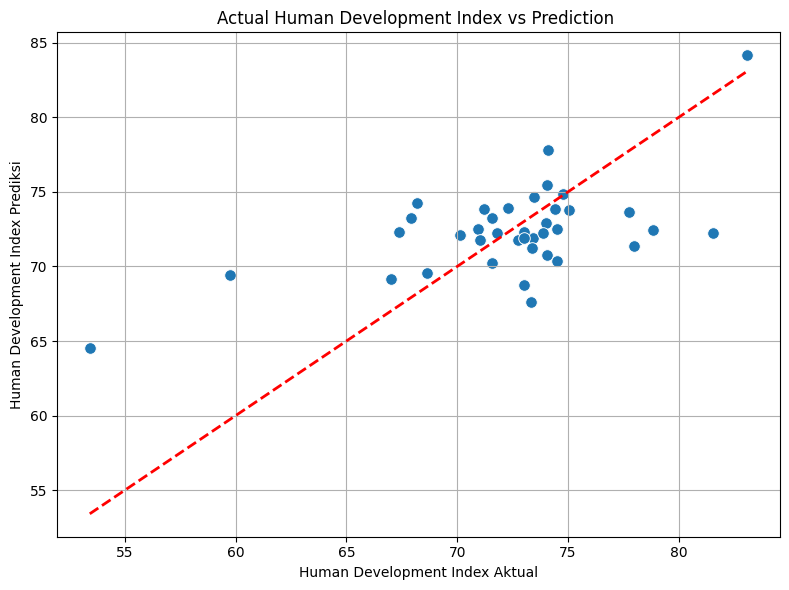

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_multi, y=y_pred_multi, s=70)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], color='red', linestyle='--', lw=2)
plt.xlabel('Human Development Index Aktual')
plt.ylabel('Human Development Index Prediksi')
plt.title('Actual Human Development Index vs Prediction ')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Tambahkan konstanta (intercept)
X_sm_multi = sm.add_constant(X_multi)

# Fit model OLS
model_sm = sm.OLS(y_multi, X_sm_multi).fit()

# Tampilkan ringkasan
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                    IPM   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     4.430
Date:                Sat, 25 Oct 2025   Prob (F-statistic):            0.00563
Time:                        00:22:21   Log-Likelihood:                -107.53
No. Observations:                  38   AIC:                             225.1
Df Residuals:                      33   BIC:                             233.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [19]:
# Analisis per wilayah
regional_summary = df.groupby('Pulau')[features + ['Cluster']].mean()

# Outlier Detection
z_scores = df[features].apply(zscore)
outliers = df[(np.abs(z_scores) > 3).any(axis=1)]

In [20]:
print(regional_summary)

            Jumlah Penduduk  Kepadatan Penduduk per km2        IPM  \
Pulau                                                                
Bali-Nusa       5245.100000                  400.666667  72.026667   
Jawa           26154.633333                 3668.833333  76.918333   
Kalimantan      3512.860000                   43.000000  73.548000   
Maluku          1650.600000                   41.500000  71.300000   
Papua            958.066667                   16.166667  64.953333   
Sulawesi        3468.516667                  119.333333  72.258333   
Sumatera        6151.580000                  144.700000  73.956000   

                    PDRB  Garis Kemiskinan (Rp/Bulan)   Cluster  
Pulau                                                            
Bali-Nusa   2.059964e+05                402645.500000  1.000000  
Jawa        2.092652e+06                450017.500000  0.666667  
Kalimantan  3.630149e+05                527846.800000  1.000000  
Maluku      7.921696e+04               

In [21]:
import pandas as pd
from IPython.display import display

display(df)

,Provinsi,Jumlah Penduduk,Kepadatan Penduduk per km2,IPM,PDRB,Garis Kemiskinan (Rp/Bulan),Pulau,Cluster,PCA1,PCA2
0,Aceh,5554.8,98,74.03,243202.09,503746.0,Sumatera,1,-0.323562,-0.012433
1,Sumatera Utara,15588.5,215,74.02,1146919.76,493135.0,Sumatera,1,0.787947,-0.139307
2,Sumatera Barat,5836.2,139,74.49,332936.44,540419.0,Sumatera,1,-0.281872,0.293417
3,Riau,6728.1,75,74.79,1112481.62,514365.5,Sumatera,1,0.370935,0.181561
4,Jambi,3724.3,76,73.43,322975.53,494663.5,Sumatera,1,-0.380586,-0.021921
5,Sumatera Selatan,8837.3,102,72.30,663961.72,418372.0,Sumatera,1,0.155332,-0.665726
6,Bengkulu,2112.2,105,73.39,103991.92,493324.0,Sumatera,1,-0.599716,-0.028526
7,Lampung,9419.6,281,71.81,483882.92,443145.0,Sumatera,1,-0.007030,-0.462022
8,Kepulauan Bangka Belitung,1531.5,92,73.33,107504.82,666775.0,Sumatera,1,-0.995548,1.391083
9,Kepulauan Riau,2183.3,264,77.97,352436.43,545152.5,Sumatera,1,-0.135950,0.368819


In [22]:
df.groupby('Cluster')[['IPM', 'PDRB', 'Garis Kemiskinan (Rp/Bulan)']].mean()

,IPM,PDRB,Garis Kemiskinan (Rp/Bulan)
Cluster,,,
0,74.133333,2.603137e+06,398698.833333
1,71.920000,3.097582e+05,488270.279412
2,83.080000,3.679359e+06,581175.500000


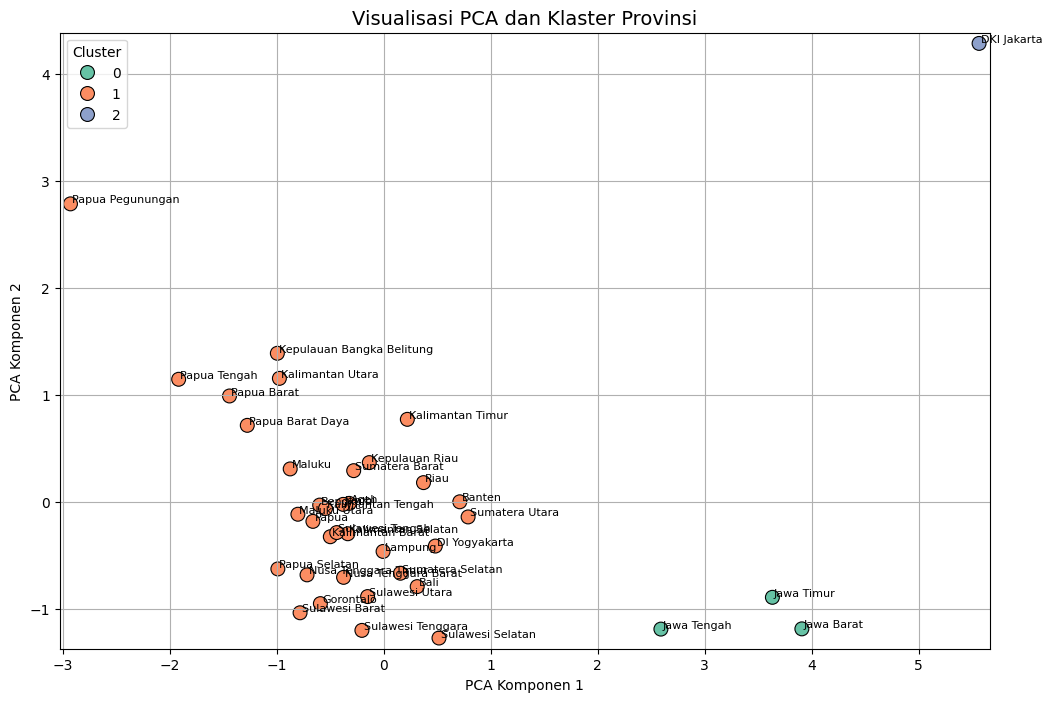

In [23]:
plt.figure(figsize=(12, 8))

# Scatter plot klaster
sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Tambahkan label nama provinsi
for i in range(len(df)):
    plt.text(
        df['PCA1'][i] + 0.015,  # offset horizontal
        df['PCA2'][i] + 0.01,   # offset vertikal
        df['Provinsi'][i],
        fontsize=8
    )

plt.title("Visualisasi PCA dan Klaster Provinsi", fontsize=14)
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.xlim(df['PCA1'].min() - 0.1, df['PCA1'].max() + 0.1)  
plt.ylim(df['PCA2'].min() - 0.1, df['PCA2'].max() + 0.1)
plt.show()


In [24]:
gdf = gpd.read_file('C:/Users/Binta/Downloads/BATAS WILAYAH KELURAHAN-DESA 10K/Batas_Wilayah_KelurahanDesa_10K_AR.shp')

In [25]:
print(gdf.columns)

Index(['OBJECTID', 'NAMOBJ', 'FCODE', 'REMARK', 'METADATA', 'SRS_ID', 'KDBBPS',
       'KDCBPS', 'KDCPUM', 'KDEBPS', 'KDEPUM', 'KDPBPS', 'KDPKAB', 'KDPPUM',
       'LUASWH', 'TIPADM', 'WADMKC', 'WADMKD', 'WADMKK', 'WADMPR', 'WIADKC',
       'WIADKK', 'WIADPR', 'WIADKD', 'UUPP', 'LUAS', 'geometry'],
      dtype='object')


In [26]:
gdf.head()

,OBJECTID,NAMOBJ,FCODE,REMARK,METADATA,SRS_ID,KDBBPS,KDCBPS,KDCPUM,KDEBPS,...,WADMKD,WADMKK,WADMPR,WIADKC,WIADKK,WIADPR,WIADKD,UUPP,LUAS,geometry
0,1718.0,Cidadap,BA03070040,Wilayah Administrasi Kelurahan/Desa,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,SRGI 2013,3202,3202081,32.02.44,3202081002,...,Cidadap,Sukabumi,Jawa Barat,None,None,None,None,Hasil Delineasi Batas Desa 2017,19.465373,"POLYGON Z ((106.97546 -7.2861 0, 106.97541 -7...."
1,1719.0,Cidadap,BA03070040,Wilayah Administrasi Kelurahan/Desa,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,SRGI 2013,3202,3202111,32.02.02,3202111004,...,Cidadap,Sukabumi,Jawa Barat,None,None,None,None,Hasil Delineasi Batas Desa 2017,11.956814,"POLYGON Z ((106.57298 -7.01349 0, 106.57344 -7..."
2,1720.0,Cidahu,BA03070040,Wilayah Administrasi Kelurahan/Desa,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,SRGI 2013,3202,3202031,32.02.25,3202031001,...,Cidahu,Sukabumi,Jawa Barat,None,None,None,None,Hasil Delineasi Batas Desa 2017,28.248993,"MULTIPOLYGON Z (((106.59943 -7.31935 0, 106.59..."
3,1721.0,Cidatar,BA03070040,Sepakat,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,SRGI 2013,32.05,32.05.160,32.05.20,32.05.160.2002,...,Cidatar,Garut,Jawa Barat,None,None,None,None,Hasil Delineasi Batas Desa 2017,2.742905,"POLYGON Z ((107.80367 -7.32397 0, 107.8037 -7...."
4,1722.0,Cidolog,BA03070040,Wilayah Administrasi Kelurahan/Desa,TASWIL1000020221227_DATA_BATAS_DESAKELURAHAN,SRGI 2013,3202,3202070,32.02.43,3202070001,...,Cidolog,Sukabumi,Jawa Barat,None,None,None,None,Hasil Delineasi Batas Desa 2017,21.720740,"POLYGON Z ((106.8222 -7.29941 0, 106.82216 -7...."


In [27]:
# 2. Gabungkan kelurahan jadi satu geometri per provinsi
gdf_prov = gdf.dissolve(by='WADMPR', as_index=False)
gdf_merge = gdf_prov.merge(df, left_on='WADMPR', right_on='Provinsi')

ValueError: Invalid RGBA argument: nan

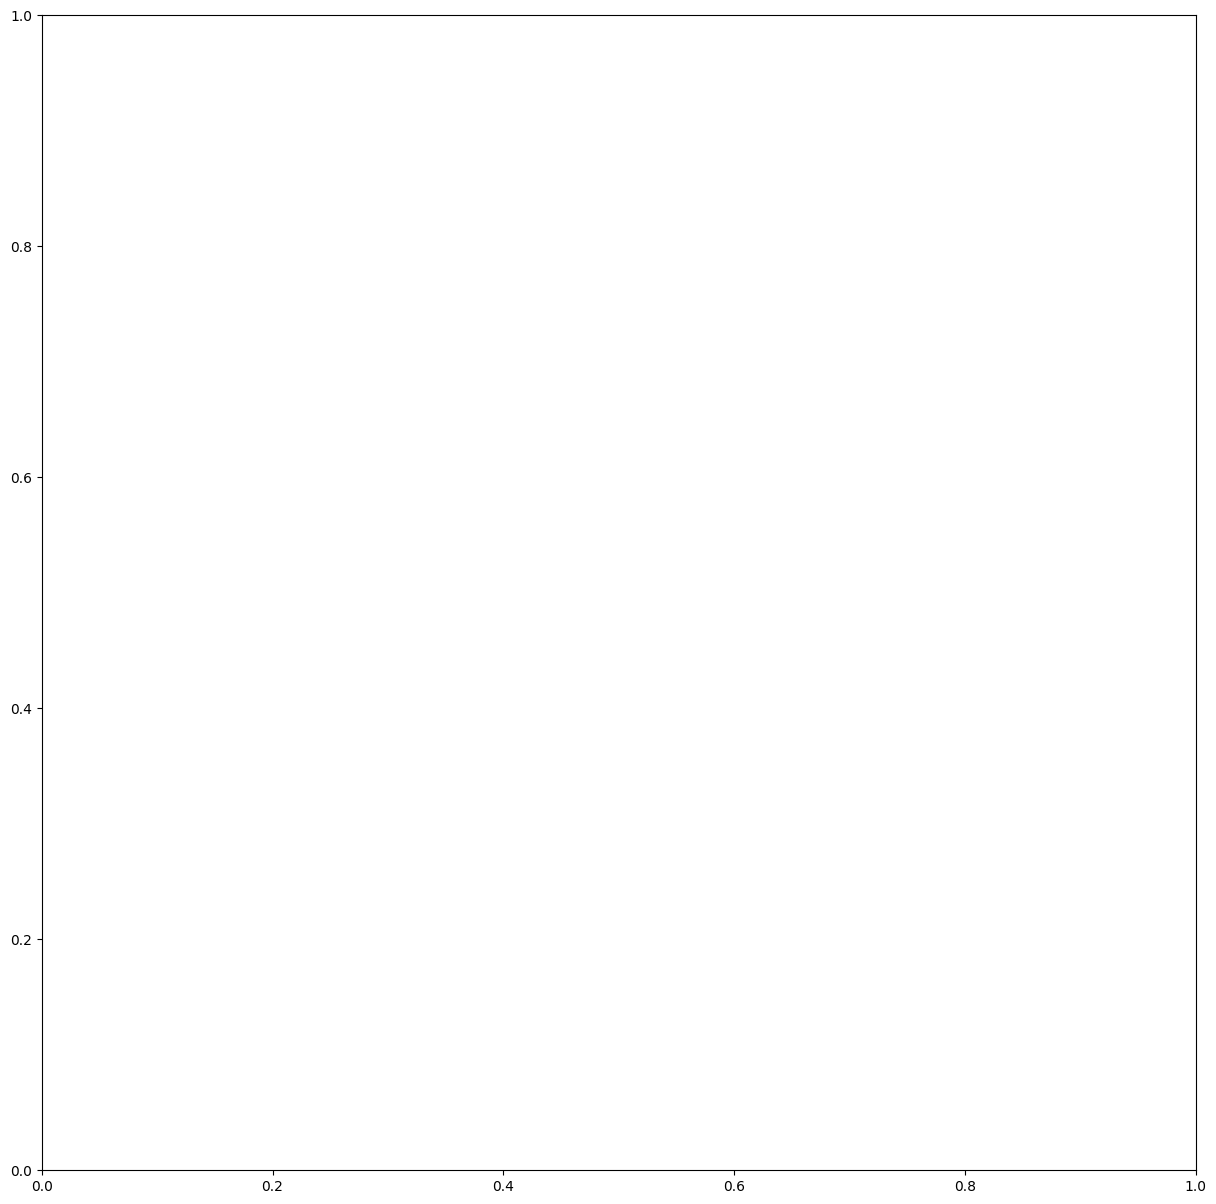

In [28]:
# Asumsikan 'Cluster' isinya 0 dan 1
cluster_color_map = {
    0: '#66c2a5',  # hijau
    1: '#fc8d62',  # oranye
}

# Buat kolom warna baru
gdf_merge['Color'] = gdf_merge['Cluster'].map(cluster_color_map)

# Buat peta
fig, ax = plt.subplots(figsize=(20, 15))

# Plot pake warna manual
gdf_merge.plot(
    color=gdf_merge['Color'],
    linewidth=0.5,
    edgecolor='black',
    ax=ax
)

# Tambahkan judul
plt.title('Peta Klaster Provinsi Indonesia berdasarkan Demografi & Pembangunan', fontsize=16, pad=20)

# Hilangkan axis
ax.axis('off')

# Tambahkan legenda manual yang lebih rapi
unique_clusters = sorted(gdf_merge['Cluster'].unique())
handles = [
    mpatches.Patch(color=cluster_color_map[c], label=f'Klaster {c}')
    for c in unique_clusters
]
ax.legend(handles=handles, title='Kategori Klaster', loc='lower left', fontsize=10, title_fontsize=12)

# Tambahkan nama provinsi di tengah-tengah geometri (opsional)
for idx, row in gdf_merge.iterrows():
    if row['geometry'].centroid.is_empty: continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, row['Provinsi'], fontsize=8, ha='center', va='center')

plt.tight_layout()
plt.show()
